# Part I - (Ford GoBike Data Exploration)
## by (Ace Mary Bajisma)

## Introduction
The dataset contains 183412 rows and 16 columns. 9 of the columns are numerical while 7 are strings.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#loading the dataset into a pandas dataframe
df = pd.read_csv('FordGoBike.csv')
#getting the first 5 rows of the data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#checking the shape of the dataset
df.shape

(183412, 16)

In [4]:
#checking for the datatypes in the dataset
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
#dropping unnecessary columns that won't be relevant for my exploration
df.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 
         'end_station_id', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [6]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_name       183215 non-null  object 
 4   end_station_name         183215 non-null  object 
 5   bike_id                  183412 non-null  int64  
 6   user_type                183412 non-null  object 
 7   member_birth_year        175147 non-null  float64
 8   member_gender            175147 non-null  object 
 9   bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 14.0+ MB


In [7]:
#dropping all rows with null values in the columns
df.dropna(subset=['start_station_name', 'end_station_name', 'member_birth_year', 'member_gender'], inplace=True)

In [8]:
#checking for the shape of the datframe after dropping rows with null values (8460 rows were removed)
df.shape

(174952, 10)

In [9]:
#changing the member_birth_year column data type from float to integer
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [10]:
#changing the start_time and end_time columns datatype from object to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

The start_time and end_time columns had both date and time in them which is a tidiness issue. I extracted the respective date, day hour, week day, and month from the columns using the strftime function in python's datetime package for only the start_time column as shown below.

In [11]:
#extracting the date, day hour, week day, and month from the start_time column
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_day_hour'] = df.start_time.dt.strftime('%H')
df['start_week_day'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%b')
df.head(3)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_day_hour,start_week_day,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,2019-02-28,17,Thursday,Feb
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,2019-02-28,12,Thursday,Feb
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,2019-02-28,17,Thursday,Feb


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  int64         
 6   user_type                174952 non-null  object        
 7   member_birth_year        174952 non-null  int32         
 8   member_gender            174952 non-null  object        
 9   bike_share_for_all_trip  174952 non-null  object        
 10  start_date               174952 non-null  object        
 11  start_day_hour           174952 non-null  object        
 12  start_week_day  

In [13]:
#checking the statistics of the data
df.describe()

,duration_sec,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000
mean,704.002744,4482.587555,1984.803135
std,1642.204905,1659.195937,10.118731
min,61.000000,11.000000,1878.000000
25%,323.000000,3799.000000,1980.000000
50%,510.000000,4960.000000,1987.000000
75%,789.000000,5505.000000,1992.000000
max,84548.000000,6645.000000,2001.000000


In [14]:
#checking the number of unique start station names
df['start_station_name'].nunique()

329

In [15]:
#checking the number of unique end station names
df['end_station_name'].nunique()

329

In [16]:
#saving the wrangled and cleaned dataframe to a csv file named FordGoBike_Cleaned
df.to_csv('FordGoBike_Cleaned.csv', index=False)

### What is the structure of your dataset?

After wrangling, there are 174952 rows and 14 columns in the dataset. Out of the 14 columns, 3 are numerical in nature while 11 are strings. There were 329 unique start and end station names.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in finding out the features that the trip duration depends on

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the trip duration should depend on the start and end stations, the day and month of travel. I also think that other variables like the user_type, member_birth_year and member_gender should have an effect on the trip duration.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: duration_sec.

### Question 1: What is the trip duration distribution in the dataset?

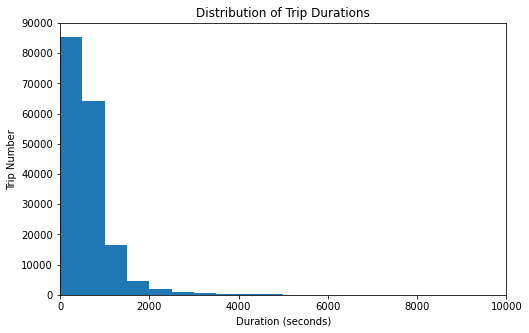

In [17]:
#plotting a histogram to show the duration distribution on standard scale
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.axis([0, 10000, 0, 90000])
plt.xlabel('Duration (seconds)')
plt.ylabel('Trip Number')
plt.title('Distribution of Trip Durations')
plt.show()

C:\Users\Mary Bajisma\AppData\Local\Temp\ipykernel_18604\214040856.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 14000])


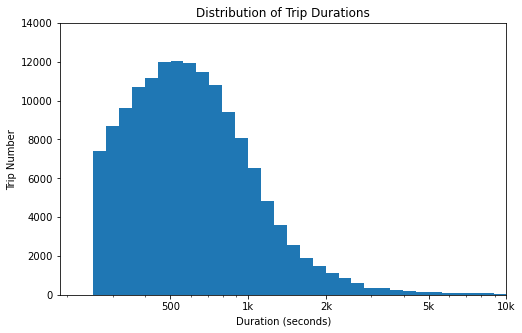

In [18]:
#plotting on a log scale because the previous visual had a long tail in the distribution
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Trip Number')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 14000])
plt.show()

It can be seen that the trip duration is mostly concentrated on the lower side of the histogram. Most of the durations are less than 2000 seconds with the peak around 600-700 seconds.

### Question 2: Which user type was more frequent?

In [19]:
#getting the value count for the user types
df_user_type = df['user_type'].value_counts()
df_user_type

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

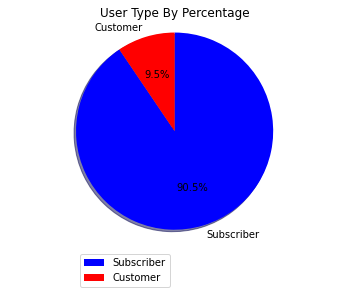

In [20]:
# pie chart depicting the user type by percentage
labels = ["Subscriber", "Customer"]
colors = ['blue', 'red']
sizes = df_user_type
plt.pie(sizes,labels=labels, colors=colors, counterclock=False, 
                         shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('User Type By Percentage')
plt.legend(labels, loc='best', bbox_to_anchor=(0.5, -0.04), ncol=1)
plt.axis('equal')
plt.show()

The number of users that were subscribers were more compared to the users that were customers with a total of 90.5%.

### Question 3: What is the gender category was the highest in the dataset?

In [21]:
#checking for number of unique gender category
df.member_gender.nunique()

3

In [22]:
#using pandas groupby function to group each gender category and their count
df_gender = df.groupby(['member_gender'])['member_gender'].count()
df_gender

member_gender
Female     40805
Male      130500
Other       3647
Name: member_gender, dtype: int64

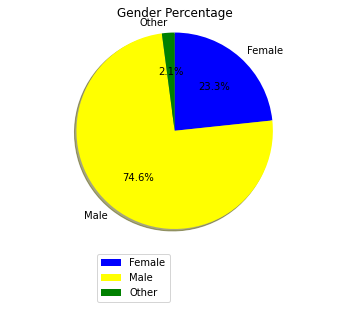

In [23]:
#A pie chart was then plotted to view the percentage of each category as shown below.
labels = ["Female", "Male", "Other"]
colors = ['blue', 'yellow', 'green']
sizes = df_gender
plt.pie(sizes,labels=labels, colors=colors, counterclock=False, 
                         shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Gender Percentage')
plt.legend(labels, loc='best', bbox_to_anchor=(0.5, -0.04), ncol=1)
plt.axis('equal')
plt.show()

Male had the highest percentage count in the dataset with a total of 74.6%.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Question 4: Which start station did passengers enter from most

In [24]:
#counting the values of each start station
start_station_count = df['start_station_name'].value_counts().to_frame()
start_station_count

,start_station_name
Market St at 10th St,3649
San Francisco Caltrain Station 2 (Townsend St at 4th St),3408
Berry St at 4th St,2952
Montgomery St BART Station (Market St at 2nd St),2711
Powell St BART Station (Market St at 4th St),2620
...,...
Farnam St at Fruitvale Ave,9
Parker Ave at McAllister St,7
21st Ave at International Blvd,4
Palm St at Willow St,3


In [25]:
#depicting the top 10 start stations
top_10_start_stations = start_station_count.head(10)
top_10_start_stations

,start_station_name
Market St at 10th St,3649
San Francisco Caltrain Station 2 (Townsend St at 4th St),3408
Berry St at 4th St,2952
Montgomery St BART Station (Market St at 2nd St),2711
Powell St BART Station (Market St at 4th St),2620
San Francisco Caltrain (Townsend St at 4th St),2577
San Francisco Ferry Building (Harry Bridges Plaza),2541
Howard St at Beale St,2216
Steuart St at Market St,2191
Powell St BART Station (Market St at 5th St),2144


In [26]:
#renaming the start_station_name column to count
top_10_start_stations.rename(columns={'start_station_name' : 'count'}, inplace=True)
top_10_start_stations.reset_index(inplace=True)
top_10_start_stations

C:\Users\Mary Bajisma\AppData\Local\Temp\ipykernel_18604\2153441607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_start_stations.rename(columns={'start_station_name' : 'count'}, inplace=True)


,index,count
0,Market St at 10th St,3649
1,San Francisco Caltrain Station 2 (Townsend St...,3408
2,Berry St at 4th St,2952
3,Montgomery St BART Station (Market St at 2nd St),2711
4,Powell St BART Station (Market St at 4th St),2620
5,San Francisco Caltrain (Townsend St at 4th St),2577
6,San Francisco Ferry Building (Harry Bridges Pl...,2541
7,Howard St at Beale St,2216
8,Steuart St at Market St,2191
9,Powell St BART Station (Market St at 5th St),2144


In [27]:
#renaming the index column to start_station_name
top_10_start_stations.rename(columns={'index' : 'start_station_name'}, inplace=True)
top_10_start_stations

C:\Users\Mary Bajisma\AppData\Local\Temp\ipykernel_18604\335215471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_start_stations.rename(columns={'index' : 'start_station_name'}, inplace=True)


,start_station_name,count
0,Market St at 10th St,3649
1,San Francisco Caltrain Station 2 (Townsend St...,3408
2,Berry St at 4th St,2952
3,Montgomery St BART Station (Market St at 2nd St),2711
4,Powell St BART Station (Market St at 4th St),2620
5,San Francisco Caltrain (Townsend St at 4th St),2577
6,San Francisco Ferry Building (Harry Bridges Pl...,2541
7,Howard St at Beale St,2216
8,Steuart St at Market St,2191
9,Powell St BART Station (Market St at 5th St),2144


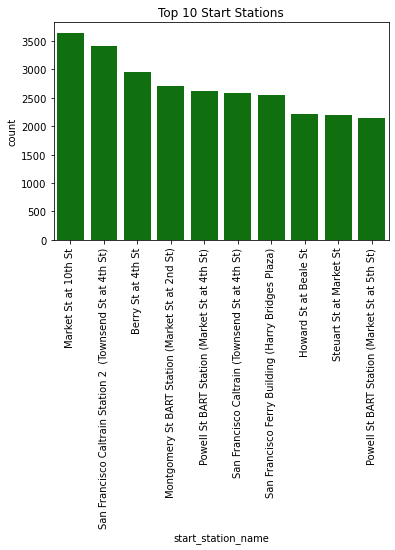

In [28]:
#depicting a bar chart of the top 10 start stations with seaborn
colors = ['green']
ax = sb.barplot(x='start_station_name', y='count', data=top_10_start_stations, palette=colors)
ax.set_title("Top 10 Start Stations")
plt.xticks(rotation=90);

Market St at 10th St station was the start station that passengers entered from the most with a total of 3649.

### Question 5: Which end station did passengers alight from most¶

In [29]:
#counting the values of each end station
end_station_count = df['end_station_name'].value_counts().to_frame()
end_station_count

,end_station_name
San Francisco Caltrain Station 2 (Townsend St at 4th St),4624
Market St at 10th St,3709
Montgomery St BART Station (Market St at 2nd St),3461
San Francisco Ferry Building (Harry Bridges Plaza),3151
San Francisco Caltrain (Townsend St at 4th St),2870
...,...
Parker Ave at McAllister St,9
Palm St at Willow St,7
16th St Depot,6
Willow St at Vine St,5


In [30]:
#depicting the top 10 end stations
top_10_end_stations = end_station_count.head(10)
top_10_end_stations

,end_station_name
San Francisco Caltrain Station 2 (Townsend St at 4th St),4624
Market St at 10th St,3709
Montgomery St BART Station (Market St at 2nd St),3461
San Francisco Ferry Building (Harry Bridges Plaza),3151
San Francisco Caltrain (Townsend St at 4th St),2870
Powell St BART Station (Market St at 4th St),2854
Berry St at 4th St,2782
The Embarcadero at Sansome St,2341
Steuart St at Market St,2264
Powell St BART Station (Market St at 5th St),2153


In [31]:
#renaming the end_station_name column to count
top_10_end_stations.rename(columns={'end_station_name' : 'count'}, inplace=True)
top_10_end_stations.reset_index(inplace=True)
top_10_end_stations

C:\Users\Mary Bajisma\AppData\Local\Temp\ipykernel_18604\3802261013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_end_stations.rename(columns={'end_station_name' : 'count'}, inplace=True)


,index,count
0,San Francisco Caltrain Station 2 (Townsend St...,4624
1,Market St at 10th St,3709
2,Montgomery St BART Station (Market St at 2nd St),3461
3,San Francisco Ferry Building (Harry Bridges Pl...,3151
4,San Francisco Caltrain (Townsend St at 4th St),2870
5,Powell St BART Station (Market St at 4th St),2854
6,Berry St at 4th St,2782
7,The Embarcadero at Sansome St,2341
8,Steuart St at Market St,2264
9,Powell St BART Station (Market St at 5th St),2153


In [32]:
#renaming the index column to end_station_name
top_10_end_stations.rename(columns={'index' : 'end_station_name'}, inplace=True)
top_10_end_stations

C:\Users\Mary Bajisma\AppData\Local\Temp\ipykernel_18604\668804784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_end_stations.rename(columns={'index' : 'end_station_name'}, inplace=True)


,end_station_name,count
0,San Francisco Caltrain Station 2 (Townsend St...,4624
1,Market St at 10th St,3709
2,Montgomery St BART Station (Market St at 2nd St),3461
3,San Francisco Ferry Building (Harry Bridges Pl...,3151
4,San Francisco Caltrain (Townsend St at 4th St),2870
5,Powell St BART Station (Market St at 4th St),2854
6,Berry St at 4th St,2782
7,The Embarcadero at Sansome St,2341
8,Steuart St at Market St,2264
9,Powell St BART Station (Market St at 5th St),2153


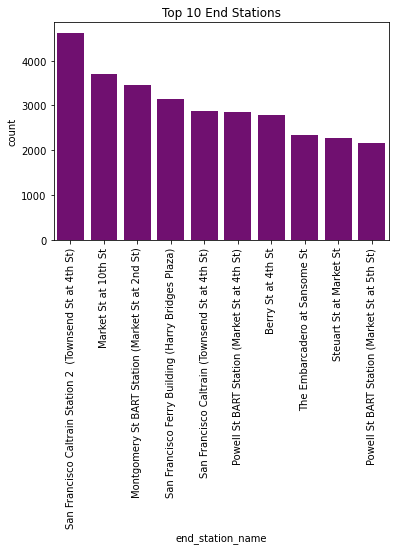

In [33]:
#depicting a bar chart of the top 10 end stations with seaborn
colors = ['purple']
ax = sb.barplot(x='end_station_name', y='count', data=top_10_end_stations, palette=colors)
ax.set_title("Top 10 End Stations")
plt.xticks(rotation=90);

San Francisco Caltrain Station 2 (Townsend St at 4th St) station was the end station that passengers alighted from the most with a total of 4624.

### Question 6: What is the percentage of trip locations that had bike share to those that didn't?

In [34]:
#checking for the unique category of bike share for all trip
df.bike_share_for_all_trip.nunique()

2

In [35]:
#using pandas groupby function to group each bike share category and their count
df_bike_share = df.groupby(['bike_share_for_all_trip'])['bike_share_for_all_trip'].count()
df_bike_share

bike_share_for_all_trip
No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

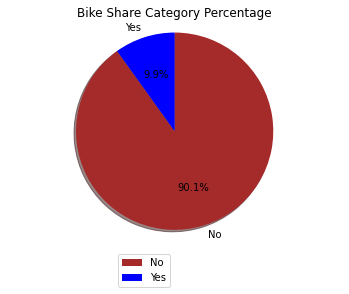

In [36]:
#A pie chart was then plotted to view the percentage of each category as shown below.
labels = ["No", "Yes"]
colors = ['brown', 'blue']
sizes = df_bike_share
plt.pie(sizes,labels=labels, colors=colors, counterclock=False, 
                         shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Bike Share Category Percentage')
plt.legend(labels, loc='best', bbox_to_anchor=(0.5, -0.04), ncol=1)
plt.axis('equal')
plt.show()

The category with no bike share for all trip was high in percentage with a total of 90.1% compared to the ones with bike share.

### Question 7: What is the age distribution in the dataset?

In [37]:
#creating a function to calculate the age of each entry in the dataset as of this year
import datetime as dt
def get_age(birth):
    today = dt.date.today()
    return today.year - birth

df['present_age'] = df.member_birth_year.map(get_age)
df['present_age']

0         38
2         50
3         33
4         48
5         63
          ..
183407    26
183408    38
183409    32
183410    34
183411    33
Name: present_age, Length: 174952, dtype: int64

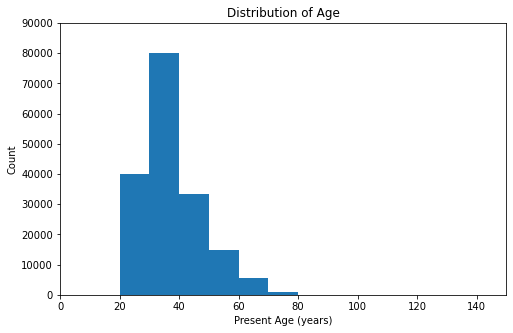

In [38]:
#plotting a histogram to show the age distribution on standard scale
binsize = 10
bins = np.arange(0, df['present_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'present_age', bins = bins)
plt.axis([0, 150, 0, 90000])
plt.xlabel('Present Age (years)')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

The histogram is skewed to the right with the peak age at around 35 years. There is an inverse relationship between an increase in age and the count (As the age increased, the count reduced).

### Question 8: Which day of the week had more trips?

In [39]:
#getting the vakue count for each day of the week based on trips
df_day = df.start_week_day.value_counts()
df_day

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_week_day, dtype: int64

In [40]:
#converting df_day to a dataframe
df_week_day = df_day.reset_index(name='count')
df_week_day

,index,count
0,Thursday,33712
1,Tuesday,30584
2,Wednesday,28426
3,Friday,27663
4,Monday,25641
5,Sunday,14512
6,Saturday,14414


In [41]:
#renaming the index column to start_week_day
df_week_day.rename(columns={'index' : 'start_week_day'}, inplace=True)
df_week_day

,start_week_day,count
0,Thursday,33712
1,Tuesday,30584
2,Wednesday,28426
3,Friday,27663
4,Monday,25641
5,Sunday,14512
6,Saturday,14414


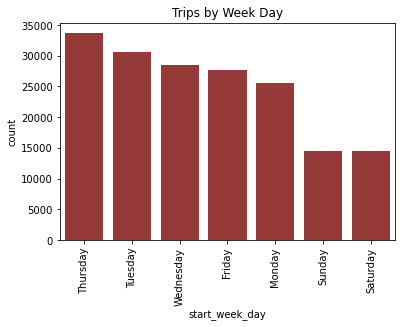

In [42]:
#bar chart depicting the number of trips for each week day.
colors = ['brown']
ax = sb.barplot(x='start_week_day', y='count', data=df_week_day, palette=colors)
ax.set_title("Trips by Week Day")
plt.xticks(rotation=90);

There were more trips on Thursdays compared to other week days with a total of 33712.

### Question 9: Which month had more trips?

In [43]:
#getting the vakue count for each day of the week based on trips
df_month = df.start_month.value_counts()
df_month

Feb    174952
Name: start_month, dtype: int64

<AxesSubplot:ylabel='start_month'>

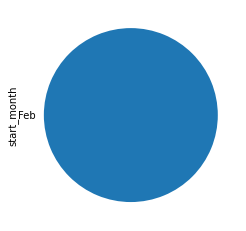

In [44]:
#depicting a pie chart to show the month that all trips took place.
df_month.plot(kind='pie')

This shows that all trips in the dataset took place in the month of February

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip duration took large amount of values and was concentrated to a tail so I depicted the chart in log scale and discovered that the peak occured at 600-700 seconds. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I discovered that there was only one month that trips took place in the dataset which is the month of February. I had to re-clean the data by changing the data type of the start_time and end_time columns from object to datetime and also separating the start_time column to get the corresponding time, day and month to get insights based on the day of the week and month that had more trips.

## Bivariate Exploration

In [45]:
#In this exploration, I will focus on trip duration that is less than 1 hour (3600 seconds)
trip_duration = df.query("duration_sec <= 3600")

### Question 10: What is the relationship between the trip duration and the user types?

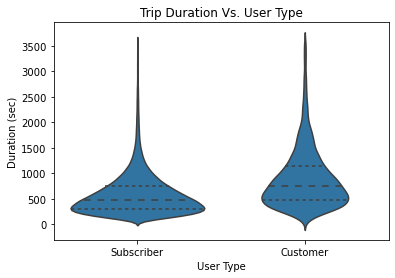

In [46]:
#depicting a violin plot for the relationship between trip duration and user type
base_color = sb.color_palette()[0]
sb.violinplot(data=trip_duration, x='user_type', y='duration_sec', color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('Trip Duration Vs. User Type');

Users that were subscribers spent lesser time in their trips compared to the users that were customers by almost twice.

### Question 11: What is the relationship between the trip duration and gender?

In [47]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

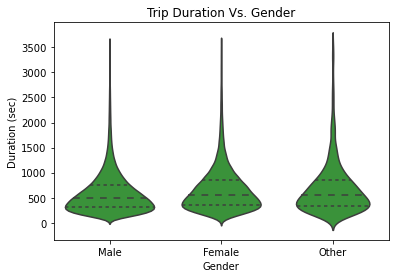

In [48]:
#depicting a violin plot for the relationship between trip duration and gender
base_color = sb.color_palette()[2]
sb.violinplot(data=trip_duration, x='member_gender', y='duration_sec', color=base_color, inner='quartile')
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('Trip Duration Vs. Gender');

Gender doesn't have any effect on the trip duration. The median from the violin plot seem the same for all the gender categories which is about 500 seconds.

### Question 12: What is the relationship between the trip duration and bike share?

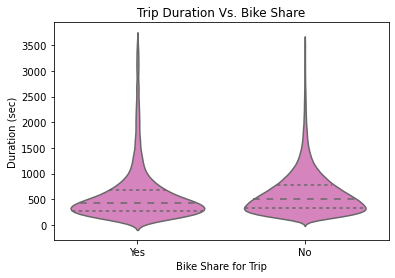

In [49]:
#depicting a violin plot for the relationship between trip duration and bike share
base_color = sb.color_palette()[6]
sb.violinplot(data=trip_duration, x='bike_share_for_all_trip', y='duration_sec', color=base_color, inner='quartile')
plt.xlabel('Bike Share for Trip')
plt.ylabel('Duration (sec)')
plt.title('Trip Duration Vs. Bike Share');

Bike share doesn't have any effect on the trip duration. The median from the violin plot seem the same for whether there was bike share or not which is about 500 seconds.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was discovered that gender and bike share had no effect on the trip duration as expected. The trip duration for subscribers was less compared to the trip duration for customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There wasn't any interesting relationship between other features.

## Multivariate Exploration

In [50]:
#In this exploration, I will focus on trip duration that is less than 1 hour (3600 seconds)
trip_duration = df.query("duration_sec <= 3600")

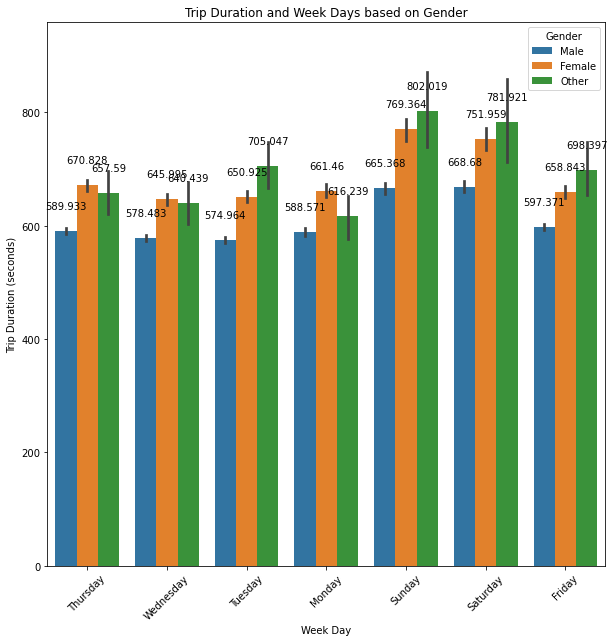

In [51]:
#depicting a clustered bar chart to show the relationship between trip duration and week days based on gender.
plt.figure(figsize=(10,10))

ax = sb.barplot(data = trip_duration, x='start_week_day', y='duration_sec', hue ='member_gender')

plt.legend(ncol=1, loc='upper right', title='Gender')
plt.xticks(rotation=45) # ax.tick_params(axis='x', rotation=45)

ax.set_title('Trip Duration and Week Days based on Gender')
ax.set_xlabel('Week Day')
ax.set_ylabel('Trip Duration (seconds)')
ax.margins(y=0.1)

# show values on the bars
for container in ax.containers:
    ax.bar_label(container, padding=20)
    

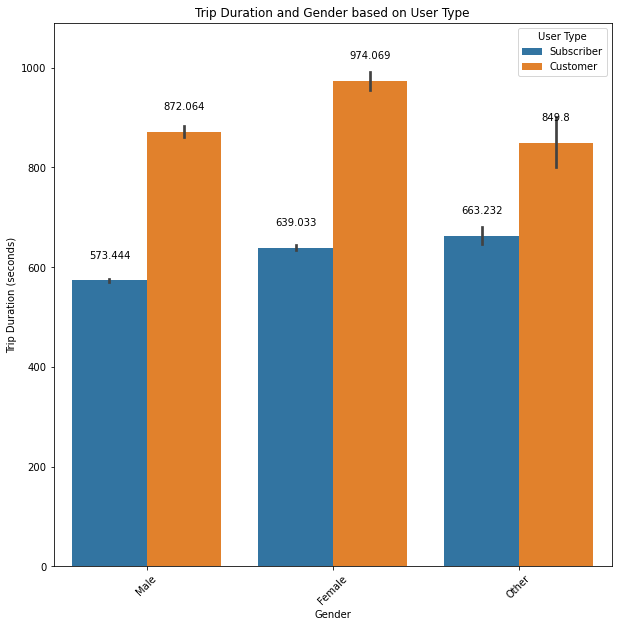

In [52]:
#depicting a clustered bar chart to show the relationship between trip duration and gender based on user type.
plt.figure(figsize=(10,10))

ax = sb.barplot(data = trip_duration, x='member_gender', y='duration_sec', hue ='user_type')

plt.legend(ncol=1, loc='upper right', title='User Type')
plt.xticks(rotation=45) # ax.tick_params(axis='x', rotation=45)

ax.set_title('Trip Duration and Gender based on User Type')
ax.set_xlabel('Gender')
ax.set_ylabel('Trip Duration (seconds)')
ax.margins(y=0.1)

# show values on the bars
for container in ax.containers:
    ax.bar_label(container, padding=20)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I discovered that the gender in the other category spent more time in their trips on Sundays. I also discovered that female customers spent the highest time in their trips while male subscribers spent the lowest time in their trips.

### Were there any interesting or surprising interactions between features?

> One interesting I found is that despite the very low percentage of the other gender category in the dataset, they were still the ones who spent the largest time in their trips on Sundays.

## Conclusions
1. From the distribution of trip duration, it was discovered that most of the durations are less than 2000 seconds with the peak around 600-700 seconds.
2. The number of users that were subscribers were more compared to the users that were customers with a total of 90.5%.
3. Male had the highest percentage count in the dataset with a total of 74.6%.
4. Market St at 10th St station was the start station that passengers entered from the most with a total of 3649.
5. San Francisco Caltrain Station 2 (Townsend St at 4th St) station was the end station that passengers alighted from the most with a total of 4624.
6. The category with no bike share for all trip was high in percentage with a total of 90.1% compared to the ones with bike share.
7. The peak age was around 35 years and there was an inverse relationship between an increase in age and the count (As the age increased, the count reduced).
8. There were more trips on Thursdays compared to other week days with a total of 33712.
9. Users that were subscribers spent lesser time in their trips compared to the users that were customers by almost twice.
10. Gender didn't have any effect on the trip duration. The median from the violin plot seemed the same for all the gender categories which is about 500 seconds.
11. Bike share didn't have any effect on the trip duration. The median from the violin plot seemed the same for whether there was bike share or not which is about 500 seconds.
12. The gender in the other category spent more time in their trips on Sundays.
13. The female customers spent the highest time in their trips while male subscribers spent the lowest time in their trips.